In [11]:
from langgraph.graph import StateGraph, START, END

from typing import TypedDict


In [12]:
class Cricket(TypedDict):
    runs : int 
    balls : int 
    fours : int 
    sixes : int 

    sr : float 
    bpb : float
    boundary_percentage : float


    summary : str

In [18]:
def cal_sr(state : Cricket) -> Cricket:
    state['sr'] = (state['runs']/state['balls'])*100
    return state

def cal_bpb(state : Cricket) -> Cricket:
    state['bpb'] = state['balls']/(state['fours'] + state['sixes'])
    return state 


def cal_bp(state : Cricket) -> Cricket:
    state['boundary_percentage'] = (((state['fours']*4 )+ (state['sixes']*6))/state['runs'])*100
    return state 

def summary(state : Cricket) -> Cricket:
    state['summary'] = f"the total number of runs are {state['runs']} in balls {state['balls']} , and stats:- \n strike rate :- {state['sr']} \n balls per boundary :- {state['bpb']} \n boundary percentage :- {state['boundary_percentage']} "
    return state

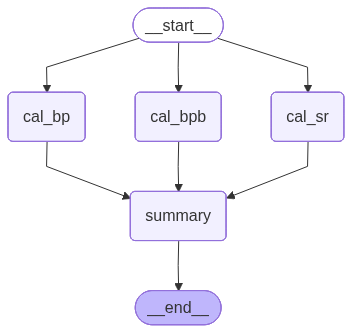

In [19]:
graph = StateGraph(Cricket)



# add nodes 


graph.add_node('cal_sr',cal_sr)
graph.add_node('cal_bpb',cal_bpb)
graph.add_node('cal_bp',cal_bp)
graph.add_node('summary',summary)



graph.add_edge(START,'cal_sr')
graph.add_edge(START,'cal_bpb')
graph.add_edge(START,'cal_bp')

graph.add_edge('cal_sr','summary')
graph.add_edge('cal_bpb','summary')
graph.add_edge('cal_bp','summary')



graph.add_edge('summary',END)



k = graph.compile()

k



In [20]:
res = k.invoke({'runs':100,'balls':54,'fours':5,'sixes':5})
print(res)

InvalidUpdateError: At key 'runs': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE